In [1]:
import pickle

import pandas as pd
import numpy as np
import os
import statsmodels
import statsmodels.api as sm
from statsmodels.stats import outliers_influence
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import scipy.stats as st
from scipy.stats import t, shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functions import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

cwd = os.getcwd()
cwd

'C:\\Users\\NA00025036\\Desktop\\autrs\\nayescha\\07 - PrédictionDesRevenus'

In [2]:
final_df = pickle.load(open(cwd + '/final_df_50.pic', 'rb'))
final_df

,country_code,country,c_i_child,Population,income,gini,pj,income_avg,c_i_parent
0,ALB,Albania,1,2882740.0,728.89795,0.30,0.815874,2994.829902,1.0
1,ALB,Albania,1,2882740.0,728.89795,0.30,0.815874,2994.829902,1.0
2,ALB,Albania,1,2882740.0,728.89795,0.30,0.815874,2994.829902,1.0
3,ALB,Albania,1,2882740.0,728.89795,0.30,0.815874,2994.829902,1.0
4,ALB,Albania,1,2882740.0,728.89795,0.30,0.815874,2994.829902,1.0
...,...,...,...,...,...,...,...,...,...
579995,COD,Congo,100,84068091.0,2243.12260,0.44,0.707703,276.016044,51.0
579996,COD,Congo,100,84068091.0,2243.12260,0.44,0.707703,276.016044,51.0
579997,COD,Congo,100,84068091.0,2243.12260,0.44,0.707703,276.016044,51.0
579998,COD,Congo,100,84068091.0,2243.12260,0.44,0.707703,276.016044,51.0


# **ANOVA income ~ country**

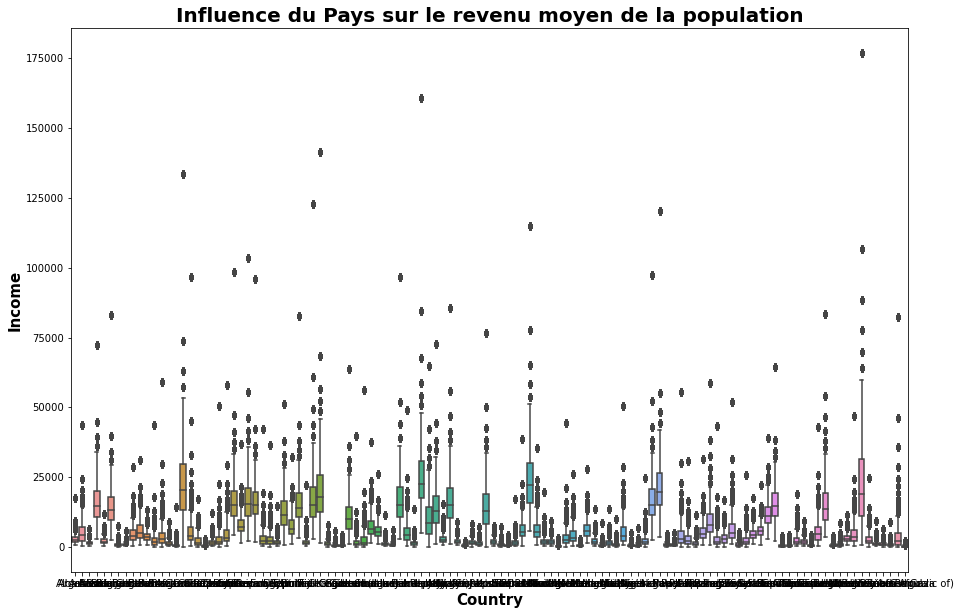

In [3]:
#Représentation des distributions par boxplot 
plt.figure(figsize=(15, 10))
sns.boxplot(x="country", y="income", data=final_df)
plt.title('Influence du Pays sur le revenu moyen de la population', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=15, fontweight='bold')
plt.ylabel('Income', fontsize=15, fontweight='bold')

plt.show()

In [4]:
#Anova pour tester l'influence du pays de l’individu sur le revenu moyen des individus 
anova_income = smf.ols('income ~ country_code', data=final_df).fit()
print(anova_income.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     4970.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:09:47   Log-Likelihood:            -5.9310e+06
No. Observations:              580000   AIC:                         1.186e+07
Df Residuals:                  579884   BIC:                         1.186e+07
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


In [5]:
#Affichage des resultats du test de Fisher (influence de la variable pays)
import statsmodels.api as sm
sm.stats.anova_lm(anova_income, typ=2)

,sum_sq,df,F,PR(>F)
country_code,2.551188e+13,115.0,4970.181077,0.0
Residual,2.588293e+13,579884.0,NaN,NaN


**Comparaison de l'ANOVA avec le logarithme du revenu de l'individu :**

In [6]:
#Calcul et intégration de la variable logarithmique 'ln_income'
final_df['ln_income'] = np.log(final_df['income'])


#Nouvelle Anova pour tester l'influence du pays de l’individu sur le logarithme du revenu moyen des individus 
anova_ln_income = smf.ols('ln_income ~ country_code', data=final_df).fit()
print(anova_ln_income.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.358e+04
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:10:26   Log-Likelihood:            -6.3135e+05
No. Observations:              580000   AIC:                         1.263e+06
Df Residuals:                  579884   BIC:                         1.264e+06
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


**Première Régression Linéaire : Revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu**

In [7]:
#Création du premier modèle de Régression linéaire
modele1 = smf.ols('income ~ gini + income_avg', data=final_df).fit()
print(modele1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.858e+05
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:10:27   Log-Likelihood:            -5.9310e+06
No. Observations:              580000   AIC:                         1.186e+07
Df Residuals:                  579997   BIC:                         1.186e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.129e-09     47.203   1.93e-10      1.0

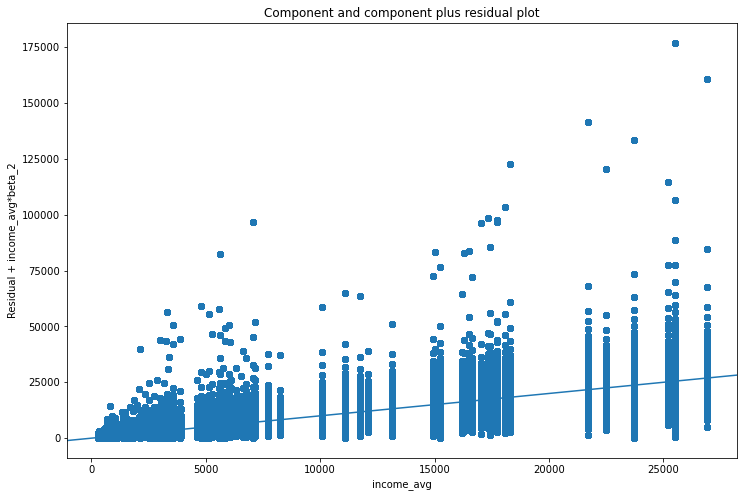

In [8]:
#Approche visuelle rapide de notre régression linéaire
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele1, "income_avg", ax=ax)

**Seconde Régression Linéaire : Logarithme du Revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu**

In [9]:
#Calcul et intégration de la variable logarithmique 'ln_income_avg'
final_df['ln_income_avg'] = np.log(final_df['income_avg'])

#Création d'un second modèle de Régression linéaire à des fins de comparaison selon le logarithme 
modele2 = smf.ols('ln_income ~ gini + ln_income_avg', data=final_df).fit()
print(modele2.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 7.769e+05
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:10:29   Log-Likelihood:            -6.3247e+05
No. Observations:              580000   AIC:                         1.265e+06
Df Residuals:                  579997   BIC:                         1.265e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4802      0.009     51.957

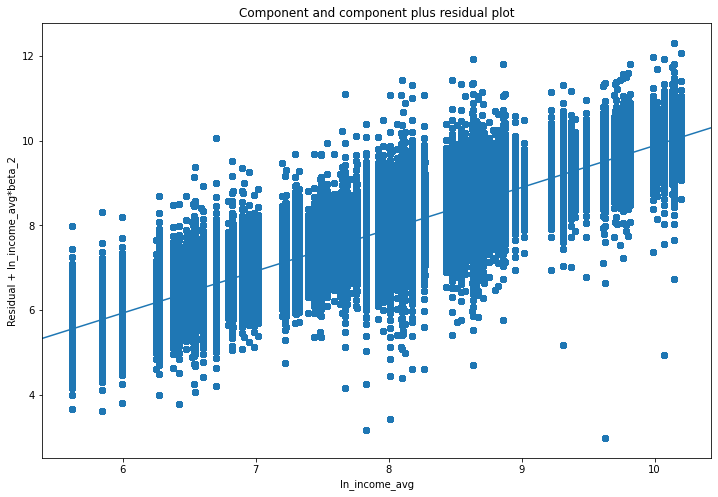

In [10]:
#Approche visuelle rapide de notre régression linéaire (cette fois-ci bien plus optimale)
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele2, "ln_income_avg", ax=ax)

Comparaison des régressions linéaires en utilisant Scikit-Learn :

In [11]:
#Premier modèle (sans logarithme)
from sklearn import linear_model
X = final_df[['income_avg', 'gini']]
y = final_df['income']

model1 = linear_model.LinearRegression().fit(X, y)
model1.score(X, y)

0.49639014231099554

In [12]:
#Second modèle (avec logarithme)
from sklearn import linear_model
X = final_df[['ln_income_avg', 'gini']]
y = final_df['ln_income']

model2 = linear_model.LinearRegression().fit(X, y)
model2.score(X, y)

0.7281888597280524

# Diagnostic de la régression linéaire des deux modèles (sans et avec logarithme)

**Normalité des résidus**

L’inférence dans la régression linéaire multiple repose sur l’hypothèse de normalité des erreurs. Une première vérification importante consiste à vérifier la compatibilité des résidus (l’erreur observée sur l’échantillon).

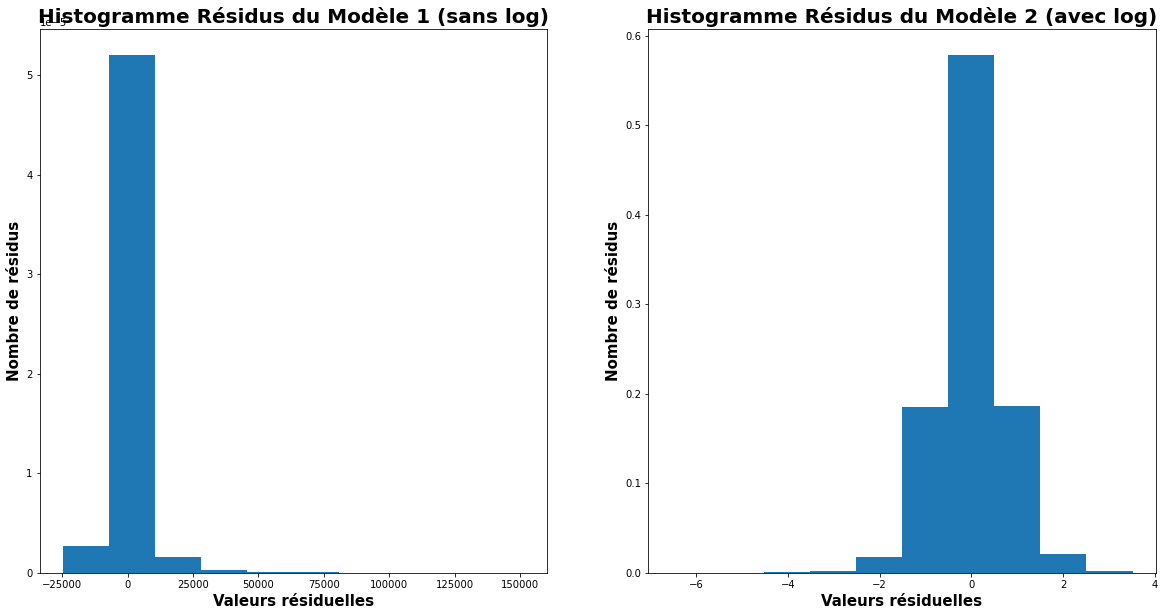

In [13]:
#Visualisation de la normalité des résidus : 
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist(modele1.resid, density=True)
plt.xlabel('Valeurs résiduelles', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de résidus', fontsize=15, fontweight='bold')
plt.title('Histogramme Résidus du Modèle 1 (sans log)', fontsize=20, fontweight='bold')

plt.subplot(122)
plt.hist(modele2.resid, density=True)
plt.xlabel('Valeurs résiduelles', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de résidus', fontsize=15, fontweight='bold')
plt.title('Histogramme Résidus du Modèle 2 (avec log)', fontsize=20, fontweight='bold')

plt.show()

Le modèle 1 (sans logarithme) renvoie une distribution des résidus qui semble suivre plus difficilement une loi normale, tandis que le second modèle propose une distribution plus gaussienne, plus homogène.

# Test de colinéarité de nos deux modèles


Vérification d'une éventuelle colinéarité approchée des variables.

In [14]:
#Modèle 1 non logarithmique
variables = modele1.model.exog
print("Modèle 1 : ")
print([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])])
print( " ")

#Modèle 2 logarithmique
variables = modele2.model.exog
print("Modèle 2 : ")
print([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])])

Modèle 1 : 
[1.121013113970977, 1.1210131139709165]
 
Modèle 2 : 
[1.0720671622745968, 1.072067162274522]


Aucun problème de colinéarité, en effet nos coefficients sont inférieurs à 10 et même à 5.

# Test d’homoscédasticité (constance des variables ) par Breusch-Pagan

Ce test consiste à vérifier la constance de la variation des résidus. En cas d'hétéroscédasticité, la variance de l'erreur n'est pas constante. Dans le cas contraire, (hypothèse d'homoscédasticité) la variance de l'erreur est constante.

In [15]:
__, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(modele1.resid, modele1.model.exog)
print('Modèle 1 p value test Breusch-Pagan:', pval)

__, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(modele2.resid, modele2.model.exog)
print('Modèle 2 p value test Breusch-Pagan:', pval)

Modèle 1 p value test Breusch-Pagan: 0.0
Modèle 2 p value test Breusch-Pagan: 0.0


H0: Homoscédasticité et H1: Hétéroscédasticité

Rejet de l'hypothèse H0, il y a hétéroscédasticité des residus.

Etant donné que nous travaillons sur un grand échantillon d'observations, le modèle de régression linéaire multiple reste robuste. De ce fait, il peut supporter des écarts importants aux hypothèses gaussiennes et homoscédastiques.

# Analyse des résidus studentisés (standardisés) :

Le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté.
Il nécessaire d'observer le rôle conjoint du levier et du résidu standardisé.

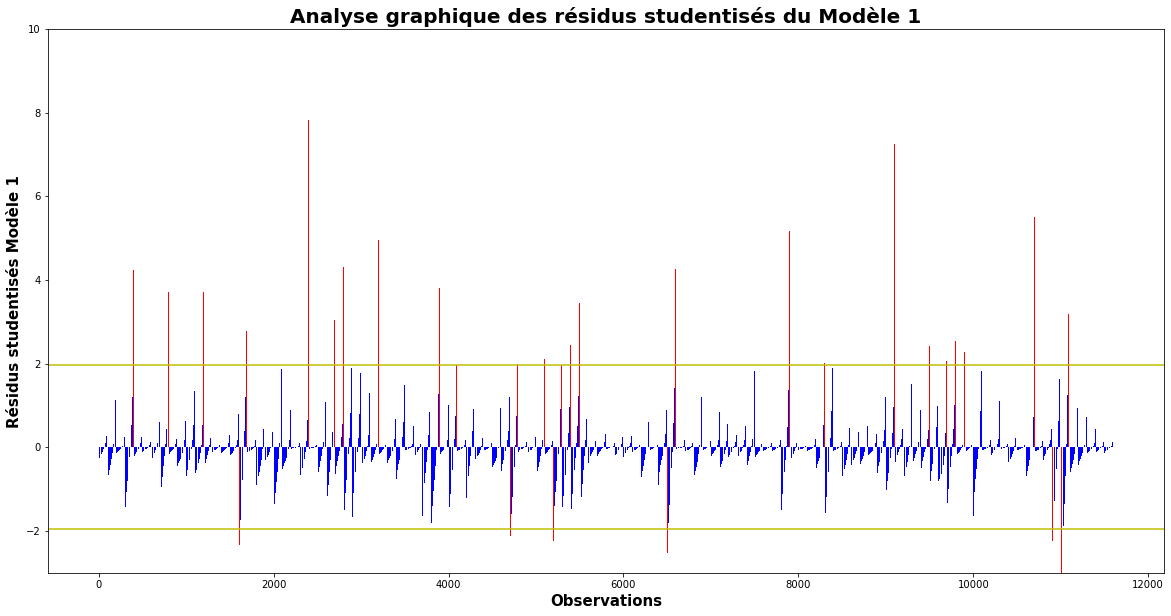

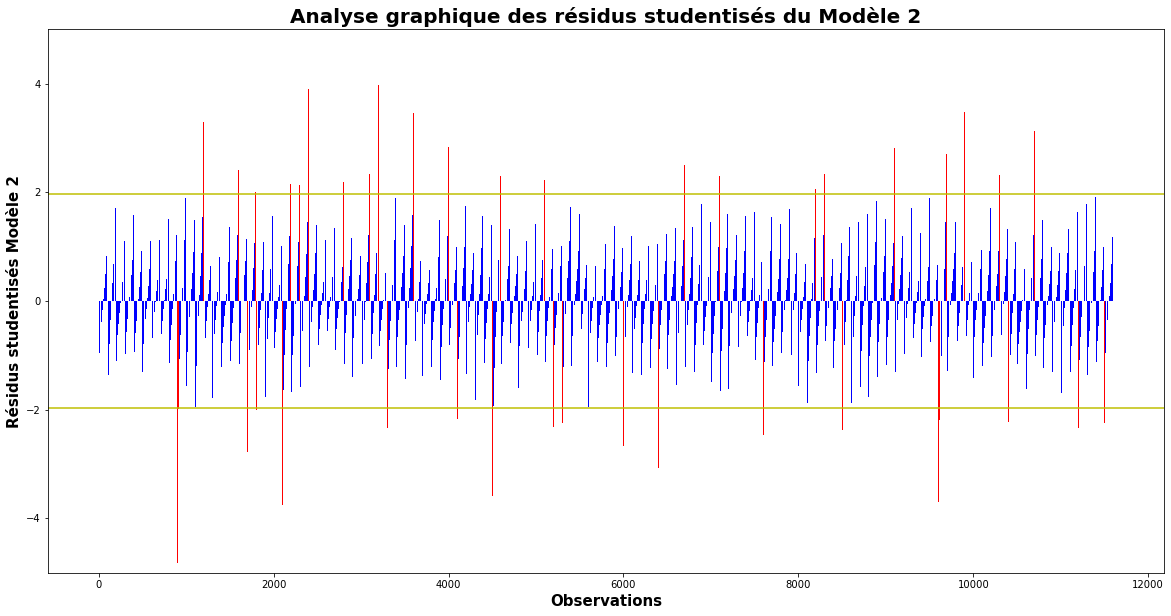

In [16]:
alpha = .05
n = len(final_df)
p = 3


#Création d'un dataframe spécifique à l'analyse des modèles
analyse = final_df.copy()
analyse.head()

#Intégration de deux nouvelles variables propres à chaque modèle
analyse['rstudent_modele1'] = modele1.get_influence().resid_studentized_internal
analyse['rstudent_modele2'] = modele2.get_influence().resid_studentized_internal

seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

#Agrégation des données selon leurs pays, vision simplifiée du couple pays-individu/rstudent
#Simplification du dataframe pour une visualisation et interprétation plus rapide
analyse_rstudent = analyse.groupby(['country', 'c_i_child']).mean().reset_index()

#Visualisation globale des résidus studentisés du Modèle 1 avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_rstudent[(analyse_rstudent['rstudent_modele1'] <= seuil_rstudent) & 
                            (analyse_rstudent['rstudent_modele1'] >= -seuil_rstudent)]['country'].index, 
        analyse_rstudent[(analyse_rstudent['rstudent_modele1'] <= seuil_rstudent) &
                            (analyse_rstudent['rstudent_modele1'] >= -seuil_rstudent)]['rstudent_modele1'], color='b')

plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele1'] > seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele1'] > seuil_rstudent]['rstudent_modele1'], color='r')
plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele1'] < -seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele1'] < -seuil_rstudent]['rstudent_modele1'], color='r')


plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Résidus studentisés Modèle 1', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des résidus studentisés du Modèle 1', fontsize=20, fontweight='bold')

plt.ylim(-3, 10)
plt.show()


#Visualisation globale des résidus studentisés du Modèle 2 avec représentation du seuil
plt.figure(figsize=(20,10))

plt.bar(analyse_rstudent[(analyse_rstudent['rstudent_modele2'] <= seuil_rstudent) & 
                            (analyse_rstudent['rstudent_modele2'] >= -seuil_rstudent)]['country'].index, 
        analyse_rstudent[(analyse_rstudent['rstudent_modele2'] <= seuil_rstudent) &
                            (analyse_rstudent['rstudent_modele2'] >= -seuil_rstudent)]['rstudent_modele2'], color='b')

plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele2'] > seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele2'] > seuil_rstudent]['rstudent_modele2'], color='r')
plt.bar(analyse_rstudent[analyse_rstudent['rstudent_modele2'] < -seuil_rstudent]['country'].index, 
        analyse_rstudent[analyse_rstudent['rstudent_modele2'] < -seuil_rstudent]['rstudent_modele2'], color='r')

plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Résidus studentisés Modèle 2', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des résidus studentisés du Modèle 2', fontsize=20, fontweight='bold')

plt.ylim(-5, 5)
plt.show()

# Amélioration du modèle le plus performant en incluant la classe de revenu des parents

Le précédent modèle en logarithme (ln) peut sans doute être encore optimisé en incluant une nouvelle variable, ici la classe de revenu des parents. Le modèle qui ressortira sera normalement plus performant, ce qui nous donnera également la part d'influence que peut avoir ce type de données sur le revenu des individus.

In [17]:
#Modèle de Régression linéaire avec ajout d'une variable supplémentaire 
modele2_parents = smf.ols('ln_income ~ gini + c_i_parent + ln_income_avg', data=final_df).fit()
print(modele2_parents.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 5.305e+05
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:11:22   Log-Likelihood:            -6.2739e+05
No. Observations:              580000   AIC:                         1.255e+06
Df Residuals:                  579996   BIC:                         1.255e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3163      0.009     34.001

# Décomposition de la variance totale expliquée

Formule de décomposition de la variance **SCT = SCE + SCR**

In [18]:
res_regr_log = sms.anova_lm(modele2_parents, typ=2)
res_regr_log 

,sum_sq,df,F,PR(>F)
gini,10472.385705,1.0,2.055710e+04,0.0
c_i_parent,5224.667528,1.0,1.025593e+04,0.0
ln_income_avg,693614.359215,1.0,1.361552e+06,0.0
Residual,295466.865382,579996.0,NaN,NaN


In [19]:
#SCT
regr_log_sct = res_regr_log.values[:,0].sum()
print("Régression log sct : " + str(regr_log_sct))

#SCE
regr_log_sce = res_regr_log.values[0,0]+res_regr_log.values[1,0]+res_regr_log.values[2,0]
print("Régression log sce : " + str(regr_log_sce))

#SCR
regr_log_scr = res_regr_log.values[2,0]
print("Régression log scr : " + str(regr_log_scr))

#R2 squared
regr_log_r2 = regr_log_sce/regr_log_sct
print("Régression log r2 : " + str(regr_log_r2))

#Variance expliquée par le revenu moyen du pays (ln_income_avg)
regr_log_sce_incomeavg = sm.stats.anova_lm(modele2_parents, typ=2).values[2,0]/regr_log_sct
print("Variance expliquée par le revenu moyen du pays (ln_income_avg) : " + str(regr_log_sce_incomeavg))

#Variance expliquée par l'indice de Gini
regr_log_sce_gini = sm.stats.anova_lm(modele2_parents, typ=2).values[0,0]/regr_log_sct
print("Variance expliquée par l'indice de Gini : " + str(regr_log_sce_gini))

#Variance expliquée par la classe de revenu des parents
regr_log_sce_pa = sm.stats.anova_lm(modele2_parents, typ=2).values[1,0]/regr_log_sct
print("Variance expliquée par la classe de revenu des parents : " + str(regr_log_sce_pa))

#Les résidus
regr_log_sce_residual = sm.stats.anova_lm(modele2_parents, typ=2).values[3,0]/regr_log_sct
print("Les résidus : " + str(regr_log_sce_residual))

Régression log sct : 1004778.2778294821
Régression log sce : 709311.4124471662
Régression log scr : 693614.359214691
Régression log r2 : 0.7059382433897932
Variance expliquée par le revenu moyen du pays (ln_income_avg) : 0.6903158383489677
Variance expliquée par l'indice de Gini : 0.010422583704284739
Variance expliquée par la classe de revenu des parents : 0.005199821336540721
Les résidus : 0.29406175661020684
